### Clustering: K Means modeling

In this portion, we are going to be talking about how to construct and use K Means modeling for clustering.  K means is not the only clustering algorithm, but its the one we are going to focus on at this time. 

The other most common one used is typically DBScan for density based scanning for clusters, which we will talk about a little more in depth during the Anomaly Detection portion of the curriculum.

> K means is pretty straightforward in operation.

In [1]:
# we have a few steps 
# in the way we construct clusters for this algo:
# step 1: assign a number (K) of centroids to our
# data set, that are merely points in space
# of the same dimensionality as the number of features
# that you wish to fit on.
# following initial assignment,
# we will calculate the distance from each point
# to every centroid, and assign a centroid to that
# row/data point based on which is the closest.
# once all points have been assigned a cluster,
# we will then change the location of the centroids
# to the mean value of each centroid's children
# rinse, repeat, until the centroids essentially 
# level out and stop moving

In [2]:
# consequences of this process:
# 1) every data point will get a cluster assignment,
# no exceptions
# 2) this is a distance based algorithm, so you
# will likely get much more value here using
# continuous features if you have them
# (there is such thing as K-Modes, which is not 
# native in sklearn but does exist if you are in 
# specific need of categorical based clustering)

> When we make clusters for K means its the same process as always with sklearn

In [3]:
# make a thing

In [4]:
# fit a thing

In [5]:
# use a thing

In [6]:
# Let's build the thing from scratch to get
# a better understanding before executing in sklearn

In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [8]:
# iris data set:

In [9]:
# proposition:
# we work with the world's clumsiest botanist,
# and we have lost the labels for our flowers
# can we make identifications on which is which?

In [10]:
# (how would we know??)

In [11]:
# wrangle process: grab that data
train = data('iris')

In [12]:
# clean up the column names:
train.columns = [
    col.lower().replace('.','_') for col in train.columns
]

In [13]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [15]:
# based on previous experience with iris,
# we know that there is a strong association
# with the petal shape
# and the label of the flower

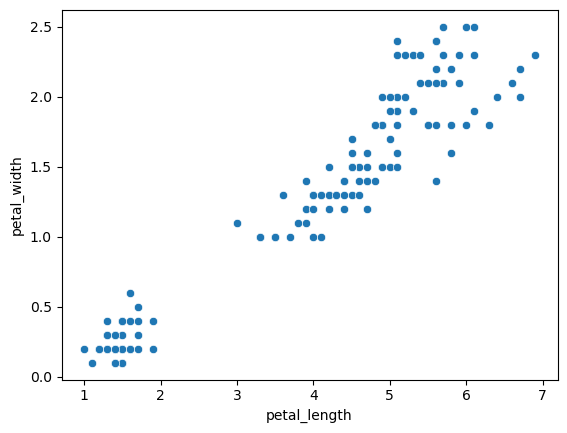

In [16]:
sns.scatterplot(data=train, x='petal_length', y='petal_width')
plt.show()

In [17]:
# we will attempt to see if we can align
# the labels that we already know exist
# to what clusters wil tell us about the distinction
# in the groupings in these two dimensions

In [18]:
# lets create a function that will give us
# distances

In [19]:
def get_distances(list_a, list_b):
    # initialize an empty list to toss the
    # differences into
    difs = []
    # for every comparison of dims in the points:
    for a_i, b_i in zip(list_a, list_b):
        difs.append((a_i - b_i) ** 2)
    return sum(difs) ** .5

In [20]:
point_a = [0, 1, 3]
point_b = [6, 10, 30]
get_distances(point_a, point_b)

29.086079144497972

In [21]:
# lets create some centroids:
centroid = {
    0: [0,0],
    1: [0.5, 0.5],
    2: [0.8,0.8]
}

In [22]:
# before we proceed, lets scale those features

In [23]:
scaler = MinMaxScaler()
train[['petal_length', 'petal_width']] = \
scaler.fit_transform(train[['petal_length', 'petal_width']])

In [24]:
feats = ['petal_length', 'petal_width']

In [25]:
# ill want to iterate through train[feats] to calculate distance
train[feats].head()

,petal_length,petal_width
1,0.067797,0.041667
2,0.067797,0.041667
3,0.050847,0.041667
4,0.084746,0.041667
5,0.067797,0.041667


In [26]:
centroid.keys()

dict_keys([0, 1, 2])

In [27]:
centroid[0]

[0, 0]

In [28]:
pd.Series([0,10,11])

0     0
1    10
2    11
dtype: int64

In [29]:
def assign_clusters():
    # initialize a place to toss cluster assignments
    cluster_assignments = []
    #iterate through every row in the dataframe:
    for i, row in train[feats].iterrows():
        # print('========')
        # toss our centroid distances somewhere:
        distances = []
        # iterate through every centroid
        for n in centroid.keys():
            # use our distance function to calc the 
            #distance between each data point and the centroids
            distances.append(get_distances(centroid[n], row.values))
        # use the distances list,
        # cast it as a series, use index of the min to link
        # back to the dictionay keys
        cluster = pd.Series(distances).idxmin()
        cluster_assignments.append(cluster)
        # print('--------')
    return cluster_assignments

In [30]:
train['cluster'] = assign_clusters()

In [31]:
# train[feats][train['cluster'] == 0]

In [32]:
train[['petal_length', 'petal_width', 'cluster']].groupby('cluster').mean().values[0]

array([0.07830508, 0.06083333])

In [33]:
# update the centroids:
# iterate through the groups:
for i in train.cluster.unique():
    centroid[i] = train[
        ['petal_length', 'petal_width', 'cluster']
    ].groupby('cluster').mean().values[i]

In [34]:
centroid

{0: array([0.07830508, 0.06083333]),
 1: array([0.55152542, 0.5075    ]),
 2: array([0.77254237, 0.80583333])}

In [35]:
feats_with_cluster = ['petal_length', 'petal_width', 'cluster']

In [36]:
centroid[0]

array([0.07830508, 0.06083333])

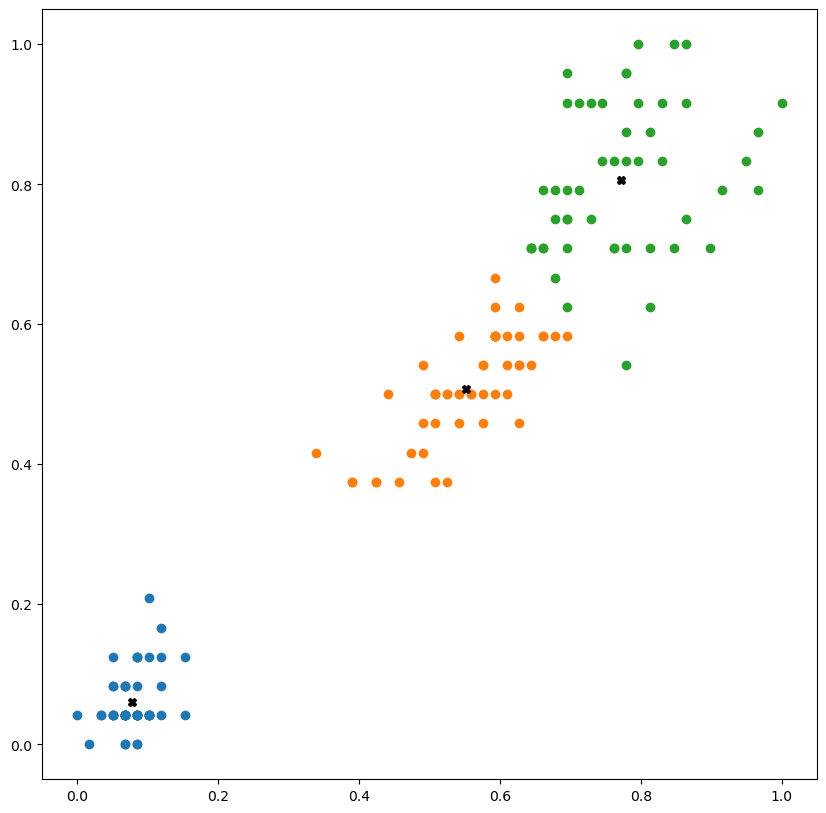

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
for cluster, subset in train[feats_with_cluster].groupby(
    'cluster'):
    ax.scatter(subset['petal_length'], subset['petal_width'], label=cluster)
for i in centroid.keys():
    # unpack the dimensions associated with the data point in the dictionary
    ax.plot(*centroid[i], marker='X', c='black')
plt.show()

In [38]:
# groupbys at least to our immediate knowledge need to
# have an aggregate function associated with them.  
# i didnt use that in the last step with that loop,
# so what gives?

In [39]:
# using a groupby without an aggregate will actually give us the
# label of the thing being grouped as well as the subset of the dataframe associated
# with that

# for i, subset in train.groupby('species'):
#     print(i)
#     print('======')
#     print(subset.to_markdown())
#     print('========')

In [40]:
# lets do those things again! indefinitely! for fun!

In [41]:
# when we are living in a loop for this information:
# assign the clusters
# update the centroids
# plot
# rinse, repeat

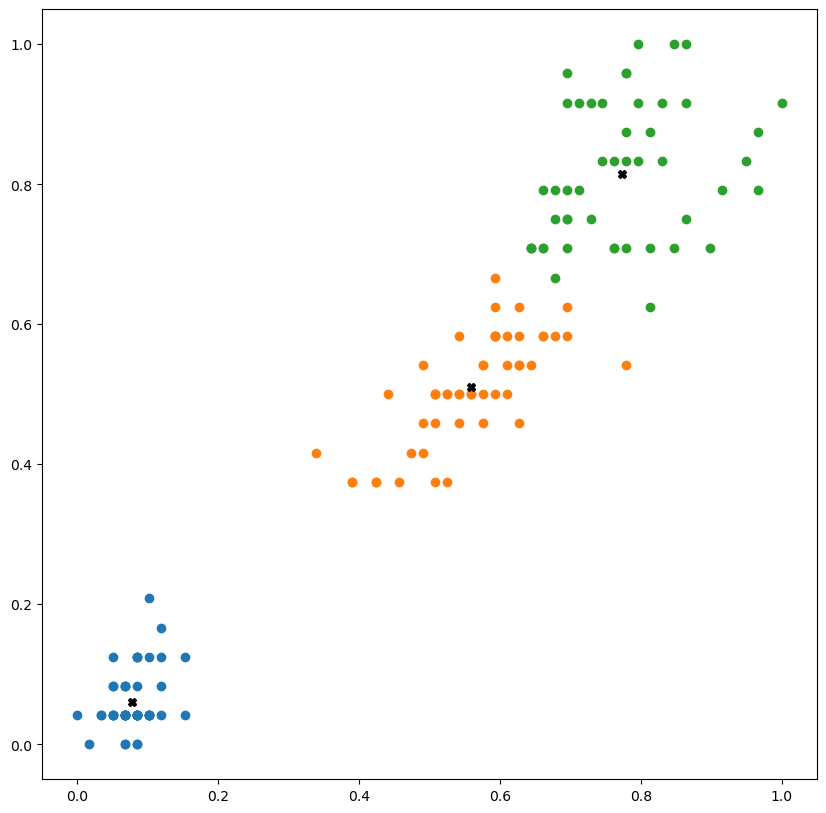

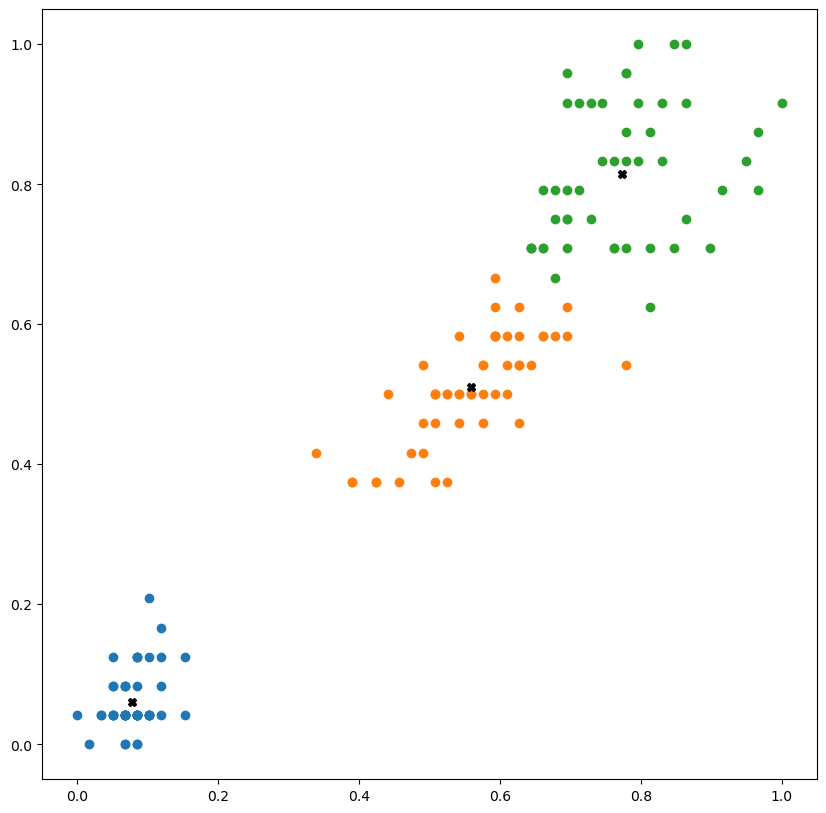

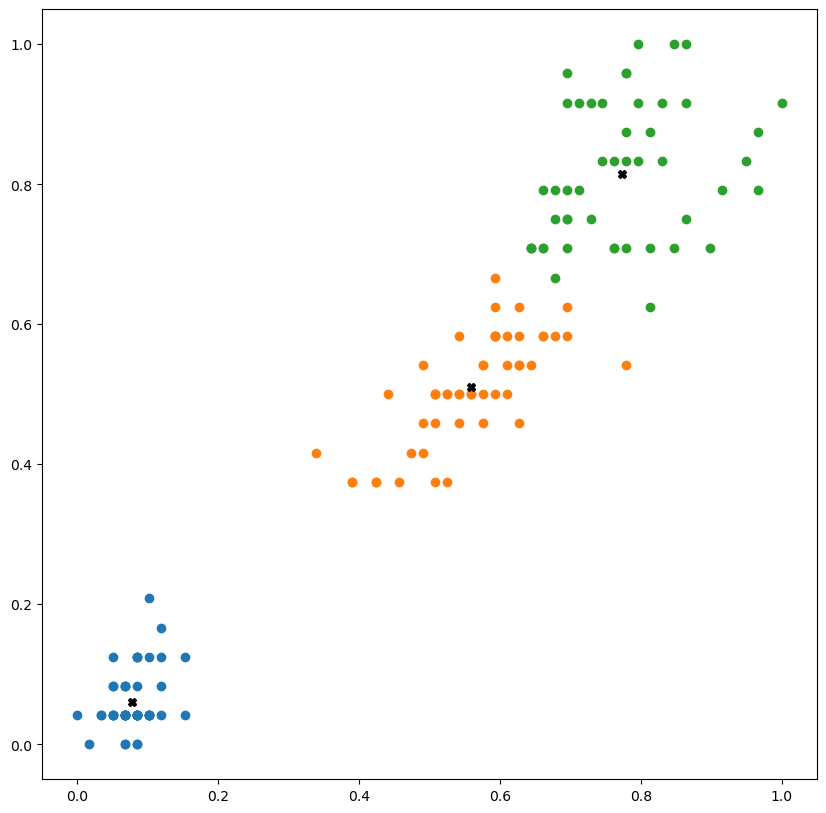

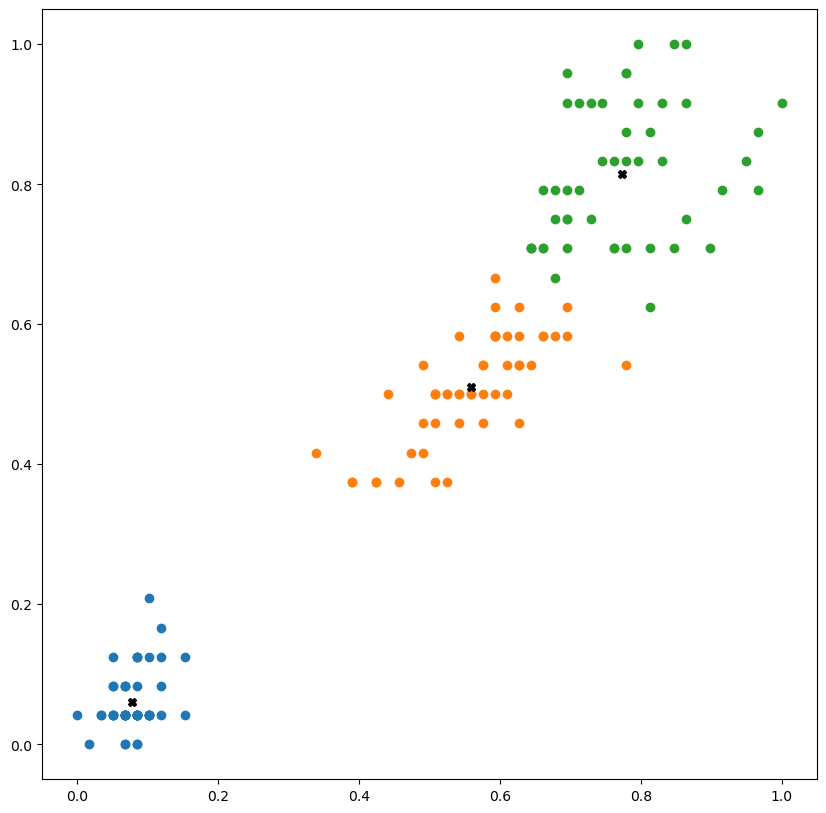

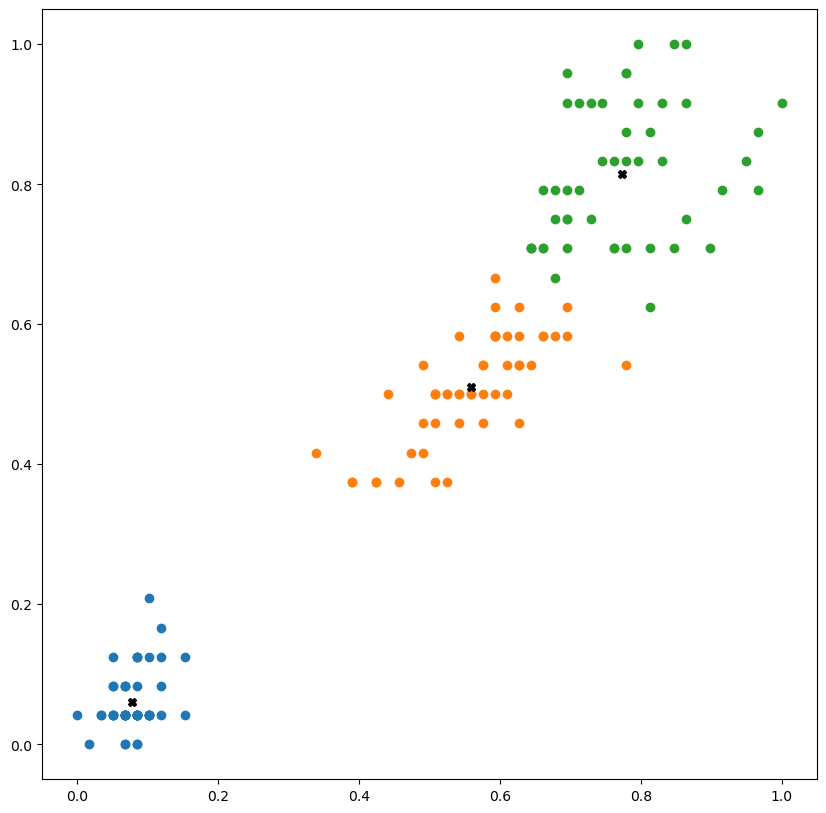

In [42]:
for i in range(5):
    # assign the clusters
    train['cluster'] = assign_clusters()
    # update the centroids
    for i in train.cluster.unique():
        centroid[i] = train[
            ['petal_length', 'petal_width', 'cluster']
        ].groupby('cluster').mean().values[i]
    # plot the stuff:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    for cluster, subset in train[feats_with_cluster].groupby(
        'cluster'):
        ax.scatter(subset['petal_length'], subset['petal_width'], label=cluster)
    for i in centroid.keys():
        # unpack the dimensions associated with the data point in the dictionary
        ax.plot(*centroid[i], marker='X', c='black')
    plt.show()

In [43]:
# the boring easy stuff whatever I guess:
# make the thing
kmeans = KMeans(n_clusters=3, n_init='auto')

In [44]:
# fit the thing
kmeans.fit(train[feats])

KMeans(n_clusters=3, n_init='auto')

In [45]:
# use the thing:
train['sk_clusters'] = kmeans.predict(train[feats])

In [46]:
kmeans.inertia_

1.7018746881920968

In [47]:
{k: v for k,v in zip(['ham', 'sandwich'], [20, 40])}

{'ham': 20, 'sandwich': 40}

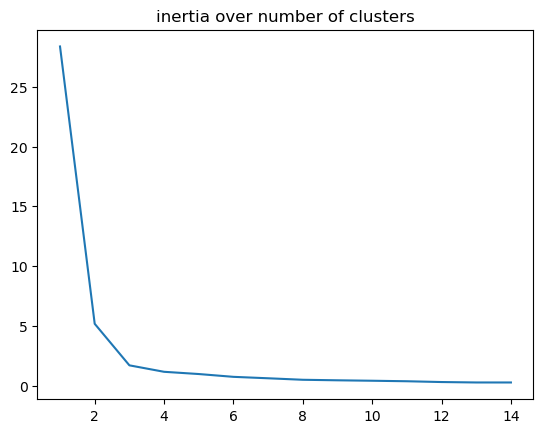

In [50]:
pd.Series(
    {i: 
 KMeans(n_clusters=i, n_init='auto').fit(train[feats]).inertia_
 for i in range(1,15)
}).plot().set(title='inertia over number of clusters');